In [ ]:
#importing  required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#loading dataset

df = pd.read_csv('../datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

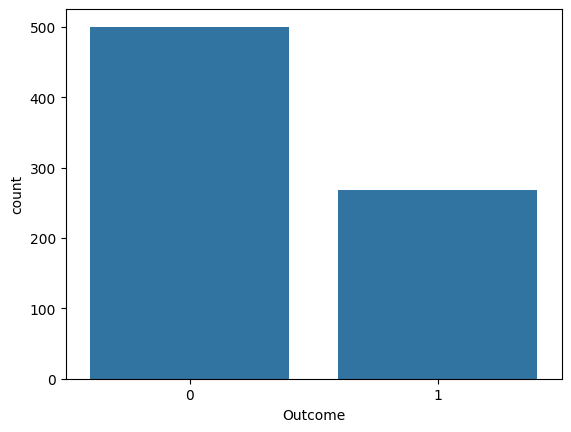

In [4]:
#checking target balance

df['Outcome'].value_counts()
sns.countplot(x='Outcome',data=df)
plt.show

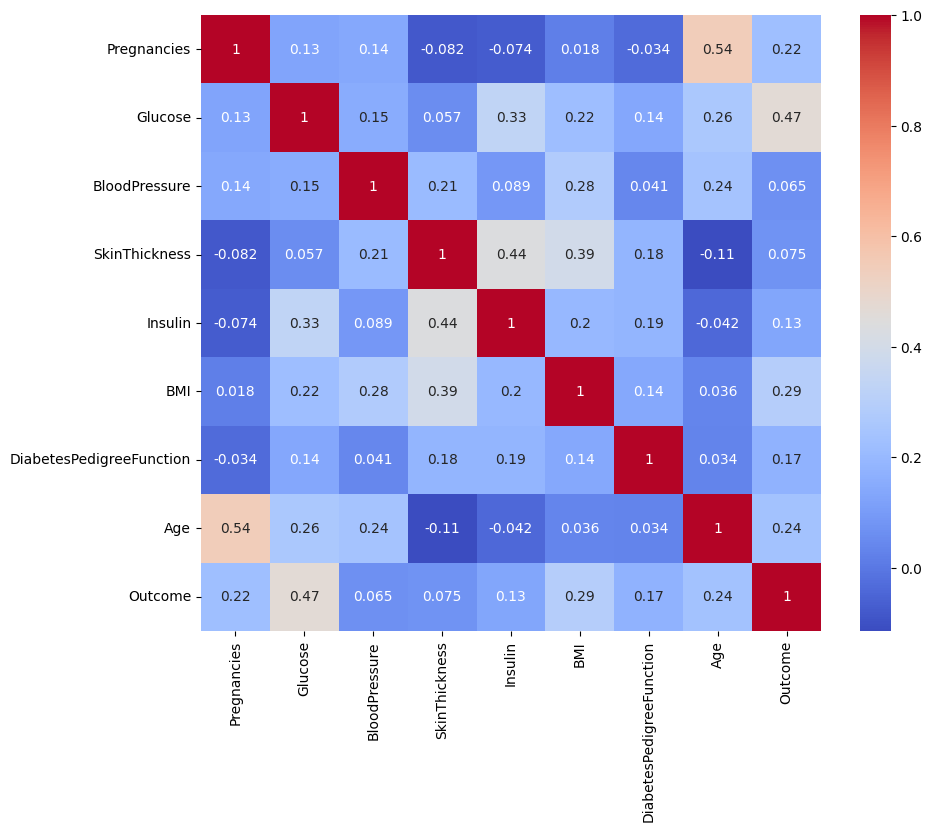

In [5]:
# correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

In [6]:
#split features and target

X=df.drop('Outcome', axis=1)
y=df['Outcome']

In [7]:
# train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [8]:
# standardization

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# logistic regression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Logistic Regression Accuracy:  0.7142857142857143
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [19]:
# Random forest

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy:  0.7467532467532467
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [11]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth'    : [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf,param_grid,cv=5,scoring='f1',n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters: ",grid.best_params_)
print("Best CV Score: ",grid.best_score_)

Best Parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score:  0.6493280815569973


In [12]:
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Tuned Random Forest Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [21]:
# probability prediction

sample_input = pd.DataFrame([[8, 99, 84, 0, 0, 35.4, 0.388, 50]],columns = X.columns)

prob = best_rf.predict_proba(sample_input)[0][1]
pred = best_rf.predict(sample_input)[0]

print("Prediction: ",pred)
print("Probability of Diabetes: ",prob)

Prediction:  0
Probability of Diabetes:  0.2136941787396087


In [ ]:
#risk level determination

def get_risk_level(prob):
    if prob < 0.3:
        return "Low"
    elif prob < 0.7:
        return "Medium"
    else:
        return "High"

risk = get_risk_level(prob)
print("Risk Level: ",risk)

Risk Level:  Low


In [15]:
# feature importance

importances = best_rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance',ascending=False)

importance_df

,Feature,Importance
1,Glucose,0.274506
5,BMI,0.167006
7,Age,0.128527
6,DiabetesPedigreeFunction,0.121174
2,BloodPressure,0.082055
0,Pregnancies,0.081655
4,Insulin,0.074027
3,SkinThickness,0.071050


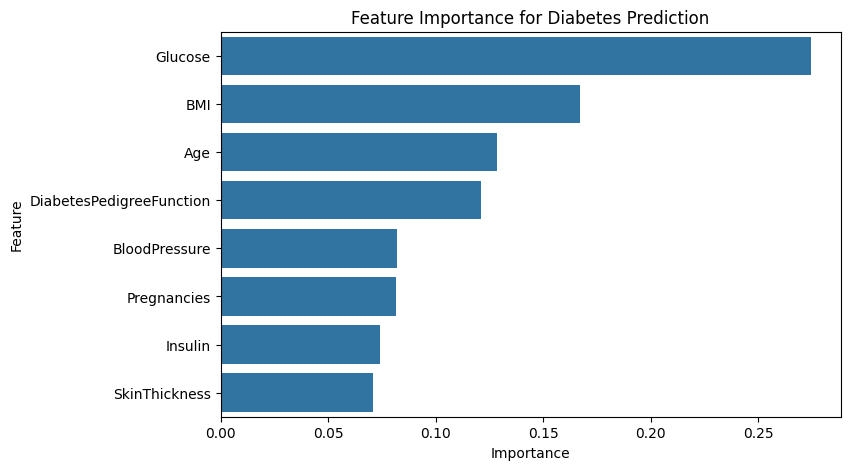

In [16]:
# ploting feature importances

plt.figure(figsize=(8,5))
sns.barplot(x='Importance',y='Feature',data=importance_df)
plt.title("Feature Importance for Diabetes Prediction")
plt.show()

In [18]:
# saving model

import pickle

with open('../models/diabetes_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

with open('../models/diabetes_scaler.pkl','wb') as f:
    pickle.dump(scaler, f)
print("Model and Scaler saved sucessfully")

Model and Scaler saved sucessfully
